# CS 171 Project
### Nicholas Kim, Christian Santos, Taeho Lee

## Briefly describe how your code can be run in each section, what is the sequence to run ? 

Run the code in order

# Data

### Describe your data source and how you will handle missing value, tranform data, or detect outliter 

Our data can be found here: https://www.kaggle.com/uciml/student-alcohol-consumption

The data was obtained through a survey of students in math and portuguese language courses in secondary school. 
It contains a lot of interesting social, gender and study information about students along with their grades for the class.

## Imports

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
pd.set_option('max_columns', None)

## Extract Data

In [40]:
students = pd.read_csv('student-mat.csv')

In [41]:
display(students)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


## Data Clean AND Variable Selection

Data Cleansing includes but not limit to : 
1. Validate the data type
2. check missing values and decide to drop data or impute data
3. Detect Outliter and decide to drop data or impute data
4. Reformat the data column title

Outlier (Anomaly) detection is important since some machine learnings are not robust to outlier, hence the coefficient 
estimation may serverly impacted by outlier. 


### 1. Validate the data type

In [42]:
print(students.dtypes)
print(students.shape)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object
(395, 33)


### 2. Check missing and duplicate values

In [43]:
print(students.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [44]:
print(students.duplicated().sum())

0


## 3. Detect Outliter and decide to drop data or impute data

In [45]:
"""
NOTE: This does not summarize non-numerical data types
"""
students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


We will want to remove the G1 and G2 columns, as they are colinear to G3, which is the value we are trying to predict

In [46]:
students = students.drop(columns=['G1', 'G2'])

We will want to remove some absences because of outliers. If we remove anything outside of the 2x interquartile range, we remove anything above 24 absences (9 records)


Text(0.5, 0, 'absences')

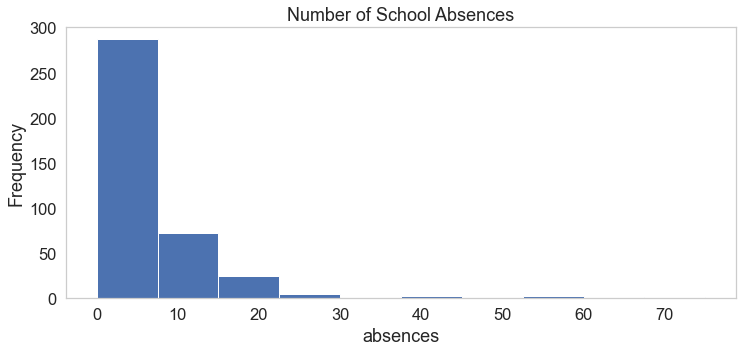

In [47]:
sns.set(rc={'figure.figsize':(12,5)}, font_scale=1.5, style='whitegrid')
absences_plot = students.absences.plot(kind='hist', title='Number of School Absences', grid = False)
absences_plot.set_xlabel("absences")

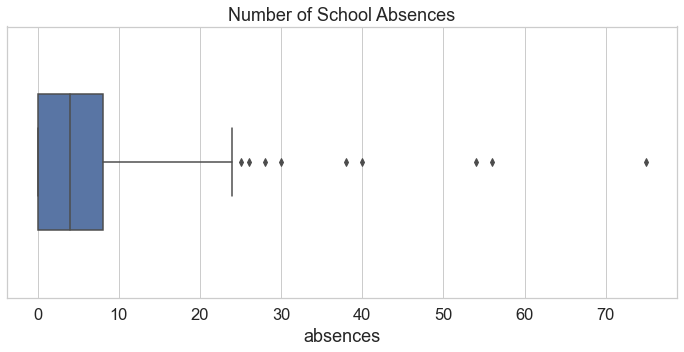

In [48]:
ax=sns.boxplot( x="absences", data=students, whis = 2.0, width = 0.5)
ax.set_title("Number of School Absences")
plt.show()

In [49]:
students = students[students.absences <= 24]

We will also want to remove some ages because outliers. There's only 4 records at or over the age of 20, which is probably not our typical secondary school student


Text(0.5, 0, 'age')

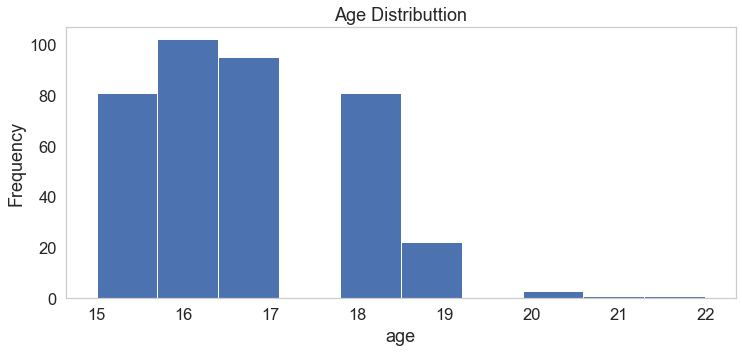

In [50]:
sns.set(rc={'figure.figsize':(12,5)}, font_scale=1.5, style='whitegrid')
absences_plot = students.age.plot(kind='hist', title='Age Distributtion', grid = False)
absences_plot.set_xlabel("age")

In [51]:
students = students[students.age < 20]

## 4. Reformat the data column title

We renamed our 'G3' column to 'final_grade' for for better understanding

In [52]:
students = students.rename(columns={"G3": "final_grade"})
students.columns = students.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('/', '_').str.replace(')', '')
display(students)

c:\users\nick\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,dalc,walc,health,absences,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,3,4,1,1,1,0,8
389,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,0
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,16
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,10


In [53]:
display(students)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,dalc,walc,health,absences,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,3,4,1,1,1,0,8
389,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,0
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,16
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,10


# Feature Engineering

## Convert Categorical Varaibles to Dummies to prevent Zero Cell Count Error

This step we will do integer encoding by replacing binary columns such as: internet, and sex to have 1's and 0's

In [54]:
students['internet'] = students.internet.eq('yes').mul(1)
students['romantic'] = students.romantic.eq('yes').mul(1)
students['higher'] = students.higher.eq('yes').mul(1)
students['nursery'] = students.nursery.eq('yes').mul(1)
students['activities'] = students.activities.eq('yes').mul(1)
students['paid'] = students.paid.eq('yes').mul(1)
students['famsup'] = students.famsup.eq('yes').mul(1)
students['schoolsup'] = students.schoolsup.eq('yes').mul(1)
students['sex'] = students.sex.eq('M').mul(1)
students['address'] = students.address.eq('U').mul(1)
students['famsize'] = students.famsize.eq('GT3').mul(1)
students['pstatus'] = students.pstatus.eq('T').mul(1)

These are currently the categorical variables that we will need to use dummy variables on

In [55]:
students[['school','mjob','fjob','reason','guardian']]

,school,mjob,fjob,reason,guardian
0,GP,at_home,teacher,course,mother
1,GP,at_home,other,course,father
2,GP,at_home,other,other,mother
3,GP,health,services,home,mother
4,GP,other,other,home,father
...,...,...,...,...,...
388,MS,teacher,services,course,mother
389,MS,other,other,course,mother
391,MS,services,services,course,mother
393,MS,services,other,course,mother


In [56]:
students = pd.get_dummies(students, columns = ['school','mjob','fjob','reason','guardian'])

## Dimension Reduction

The main motivations for dimensionality reduction are: <br>
1.To speed up a subsequent training algorithm (in some cases it may even remove noise and redundant features, making the training algorithm perform better) <br>
2.To visualize the data and gain insights on the most important features <br>
3.To save space (compression)<br>

The main drawbacks are: <br>
1.Some information is lost, possibly degrading the performance of subsequent training algorithms. <br>
2.It can be computationally intensive. <br>
3.It adds some complexity to your Machine Learning pipelines. <br>
4.Transformed features are often hard to interpret.



Combining Dalc and Walc to be an average so that we can reduce redudancies and look at overall alcohol consumption

In [57]:
students['alc'] = students[['walc', 'dalc']].mean(axis=1)
students = students.drop(columns=['walc', 'dalc'])

In [58]:
display(students)

,sex,age,address,famsize,pstatus,medu,fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,final_grade,school_GP,school_MS,mjob_at_home,mjob_health,mjob_other,mjob_services,mjob_teacher,fjob_at_home,fjob_health,fjob_other,fjob_services,fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,alc
0,0,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,3,6,6,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1.0
1,0,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,3,4,6,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1.0
2,0,15,1,0,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,3,10,10,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,2.5
3,0,15,1,1,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,5,2,15,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1.0
4,0,16,1,1,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,5,4,10,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,0,18,1,0,1,3,1,1,2,0,0,1,1,0,1,1,1,0,4,3,4,1,0,8,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1.0
389,0,18,1,1,1,1,1,2,2,1,0,0,0,1,1,1,0,0,1,1,1,5,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1.0
391,1,17,1,0,1,3,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,2,3,16,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,3.5
393,1,18,0,0,1,3,2,3,1,0,0,0,0,0,0,1,1,0,4,4,1,5,0,10,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,3.5


## Regularization

Regularization is a technique to overcome both overfitting or underfitting of the data.

## Ensemble Learning

This technique is going to be used

## Machine Learnig Algorithm Exploration


Describe what machine learning algorithms are suitable to answer your business questions, fit the model

We will be exploring...


### Candidate ML Algorithm 1


Simple linear regression using alcohol consumption to predict final grade


In [142]:
students_x = students[['alc']].copy(deep=True)
students_y = students[['final_grade']].copy(deep=True)

In [143]:
scaler = StandardScaler()
x = scaler.fit_transform(students_x)
y = scaler.fit_transform(students_y)

In [144]:
#Scikit-learn
x_train, x_test, y_train, y_test = train_test_split(students_x, \
                                                    students_y, \
                                                    test_size=0.2, \
                                                    random_state=4)

In [145]:
reg_simple = linear_model.LinearRegression()
reg_simple.fit(x_train, y_train)

LinearRegression()

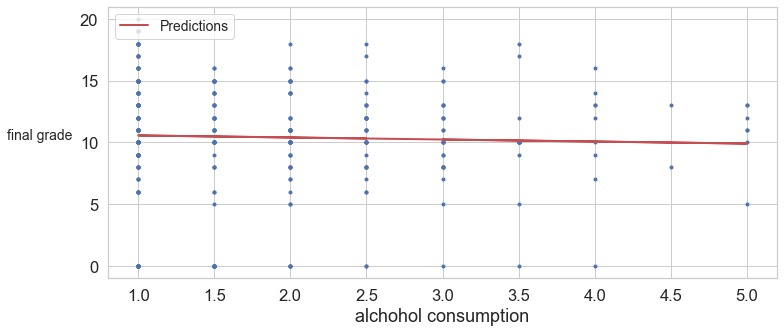

In [146]:

y_new = reg_simple.predict(x_train)
plt.plot(x_train, y_train, "b.")
plt.plot(x_train, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("alchohol consumption", fontsize=18)
plt.ylabel("final grade", labelpad = 40.0, rotation=0, fontsize=14)
plt.legend(loc="upper left", fontsize=14)
# plt.axis([-3, 3, 0, 10])
plt.show()

In [147]:
print(reg_simple.coef_)
print(reg_simple.intercept_)
print(reg_simple.score(x_train, y_train)) # R^2 for training set
print(reg_simple.score(x_test, y_test)) # R^2 for test set

[[-0.16411442]]
[10.72682731]
0.0012331108846272976
0.004820152478384188


In [148]:
yhat = reg_simple.predict(x_test)

In [149]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, yhat)

20.488384703639483

### Candidate ML Algorithm 2


Multiple linear regression using all other features other than alcohol consumption to predict final grade


In [150]:
students_x = students.drop(['alc', 'final_grade'], axis=1)
students_y = students[['final_grade']].copy(deep=True)

In [151]:
scaler = StandardScaler()
x = scaler.fit_transform(students_x)
y = scaler.fit_transform(students_y)

In [152]:
#Scikit-learn
x_train, x_test, y_train, y_test = train_test_split(students_x, \
                                                    students_y, \
                                                    test_size=0.2, \
                                                    random_state=4)

In [153]:
reg_multi = linear_model.LinearRegression()
reg_multi.fit(x_train, y_train)

LinearRegression()

In [154]:
print(reg_multi.coef_)
print(reg_multi.intercept_)
print(reg_multi.score(x_train, y_train)) # R^2 for training set
print(reg_multi.score(x_test, y_test)) # R^2 for test set

[[ 1.13126988e+00 -5.74514903e-01  8.63267984e-01 -1.17257333e+00
  -7.16411772e-03  3.53757503e-01  7.33942709e-02 -6.47986035e-02
   7.14341001e-01 -1.55548865e+00 -1.02049184e+00 -1.27152745e+00
   5.02897621e-01 -4.37446092e-01  1.50376132e-01  1.26975711e+00
   3.53219463e-01 -9.41937411e-01  1.19294028e-01  2.84544131e-01
  -5.81550129e-01 -1.37587766e-01  1.59545034e-01 -5.26317183e+11
  -5.26317183e+11  3.81989811e+10  3.81989811e+10  3.81989811e+10
   3.81989811e+10  3.81989811e+10 -4.15680743e+11 -4.15680743e+11
  -4.15680743e+11 -4.15680743e+11 -4.15680743e+11 -2.89229230e+11
  -2.89229230e+11 -2.89229230e+11 -2.89229230e+11 -1.07520147e+12
  -1.07520147e+12 -1.07520147e+12]]
[2.26822965e+12]
0.29419888502894154
0.20993104677264995


In [155]:
yhat = reg_multi.predict(x_test)

In [156]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, yhat)

16.265639518762562

In [166]:
yhat_train= reg_multi.predict(x_train)

In [167]:
residual_train= y_train - yhat_train

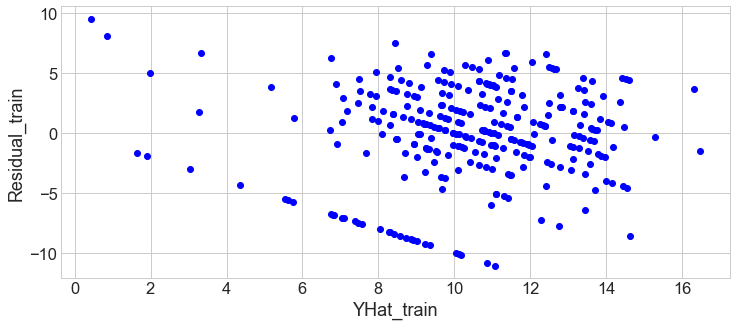

In [168]:
#Draw Residual Chart by Fitted Value of Train Data
plt.style.use('seaborn-whitegrid')
x = yhat_train
y = residual_train

plt.plot(x, y, 'o', color='blue')
plt.xlabel('YHat_train')
plt.ylabel('Residual_train');

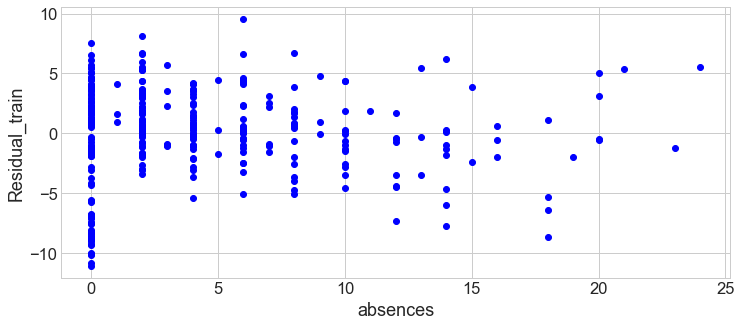

In [173]:
plt.style.use('seaborn-whitegrid')
x = x_train[["absences"]]
y = residual_train

plt.plot(x, y, 'o', color='blue')
plt.xlabel('absences')
plt.ylabel('Residual_train');

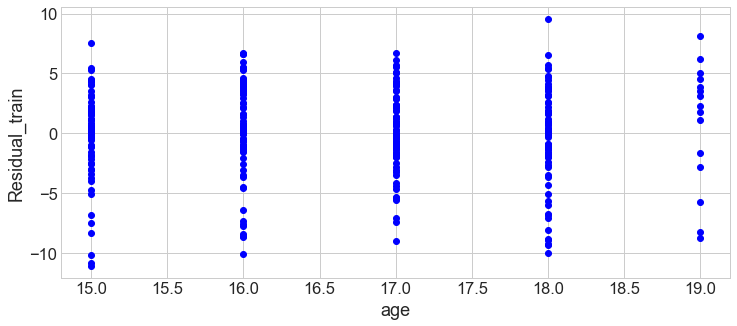

In [172]:
plt.style.use('seaborn-whitegrid')
x = x_train[["age"]]
y = residual_train

plt.plot(x, y, 'o', color='blue')
plt.xlabel('age')
plt.ylabel('Residual_train');

### Candidate ML Algorithm 3

In [106]:
students_x = students[['absences']].copy(deep=True)
students_y = students[['final_grade']].copy(deep=True)

In [107]:
X_b = np.c_[np.ones((381, 1)), students_x]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(students_y)

In [108]:
theta_best

array([[9.99852793],
       [0.09008159]])

In [120]:
X_new = np.array([[0], [25]]) #assign 2 new x instance 0 and 2
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 9.99852793],
       [12.25056764]])

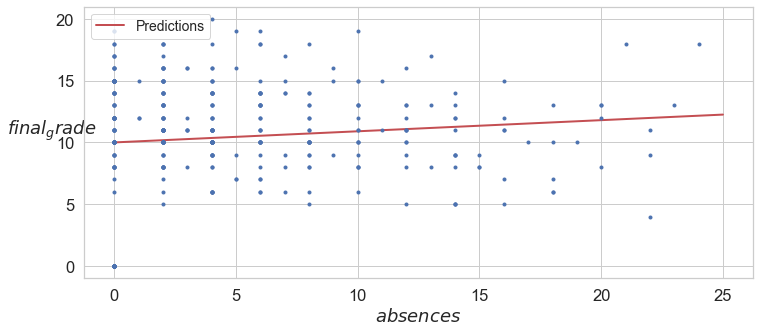

In [121]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(students_x, students_y, "b.")
plt.xlabel("$absences$", fontsize=18)
plt.ylabel("$final_grade$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

## In-Sample Validation


Describe the what metric you will use for testing model performance, and list the performance for each algorithm you tried 


### Peformance of ML Algorithm 1

In [157]:
"""
R^2 for training data: 0.0012331108846272976
R^2 for test data: 0.004820152478384188
MSE: 20.488384703639483
"""

'\nR^2 for training data: 0.0012331108846272976\nR^2 for test data: 0.004820152478384188\nMSE: 20.488384703639483\n'

In [ ]:
"""
Interpretation: 

This linear regression model serves as a baseline to our other models. While it may be alarming to see a low r-squared value,
we would argue that this is normal. We can't assume that alcohol consumption or any other relevant predictors to explain a
student's grade in secondary school. This is due to the fact that humans are extremely complex. However, we can see that there
is a high amount of variance in the data. 

"""

## Peformance of ML Algorithm 2

In [158]:
"""
R^2 for training data: 0.29419888502894154
R^2 for test data: 0.20993104677264995
MSE: 16.265639518762562
"""

'\nR^2 for training data: 0.29419888502894154\nR^2 for test data: 0.20993104677264995\nMSE: 16.265639518762562\n'

In [ ]:
"""
Interpretation:

Our R^2 values for this model were on the lower side. However, this does not mean that the model is bad. It simply
means thats there are various factors that influence a person's grade. It is very hard to predict humans. As indicated by 
the r-squared values and the MSE values, we had better results compared to our first model. This would seemingly suggest that 
we had a significantly better linear model fit.

"""

## Peformance of ML Algorithm 3

## Ensemble Technique Applied


Describe the what ensemble technique can be applied to enhance your model performance and how do you apply it, 
you can try couple differnt esenble methods if you want 


## Conclusion


Describe what ML Algorithm(s) you finally decide to use, and what Ensemble technique(s) you decide to use, and 
conclude the model performance in terms of metric here


Assumption: all students drink